# Installing packages

In [1]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pdfminer.six

Note: you may need to restart the kernel to use updated packages.


# PDF to Text conversion

In [2]:
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import os
import sys, getopt

#converts pdf, returns its text content as a string
def convert(fname, pages=None):
    if not pages:
        pagenums = set()
    else:
        pagenums = set(pages)

    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    infile = open(fname, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close
    return text 

In [3]:
def convertMultiple(pdfDir, txtDir):
    if pdfDir == "": pdfDir = os.getcwd() + "\\" #if no pdfDir passed in 
    for pdf in os.listdir(pdfDir): #iterate through pdfs in pdf directory
        fileExtension = pdf.split(".")[-1]
        if fileExtension == "pdf":
            pdfFilename = pdfDir + pdf 
            text = convert(pdfFilename) #get string of text content of pdf
            textFilename = txtDir + pdf + ".txt"
            textFile = open(textFilename, "w", encoding="utf-8") #make text file
            textFile.write(text) #write text to text file

pdfDir = "C:/Users/hp/Desktop/PDFtotext/"
txtDir = "C:/Users/hp/Desktop/PDFtotext/"
convertMultiple(pdfDir, txtDir)

# Finding specific words and sentences from entire corpus

In [3]:
stringToMatch='sensitizers'
matchedLine=''

In [6]:
words = set(['sensitizers', 'spectral','organic'])
f     = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'rb')
data  = set(f.read().split())
print (words.intersection(data))

set()


In [7]:
import re
text = 'sensitizers spectral organic'
keywords = re.findall(r'[a-zA-Z]\w+',text)
keywords

['sensitizers', 'spectral', 'organic']

In [8]:
# Open file
f = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'r',encoding="utf8")

# Feed the file text into findall(); it returns a list of all the found strings
strings = re.findall(r'[a-zA-Z]\w+', f.read())

In [9]:
strings

['www',
 'MaterialsViews',
 'com',
 'Organic',
 'Ternary',
 'Solar',
 'Cells',
 'Review',
 'Tayebeh',
 'Ameri',
 'Parisa',
 'Khoram',
 'Jie',
 'Min',
 'and',
 'Christoph',
 'Brabec',
 'www',
 'advmat',
 'de',
 'Recently',
 'researchers',
 'have',
 'paid',
 'great',
 'deal',
 'of',
 'attention',
 'to',
 'the',
 'research',
 'and',
 'development',
 'of',
 'organic',
 'solar',
 'cells',
 'leading',
 'to',
 'breakthrough',
 'of',
 'over',
 'power',
 'conversion',
 'efﬁ',
 'ciency',
 'Though',
 'impressive',
 'further',
 'development',
 'is',
 'required',
 'to',
 'ensure',
 'bright',
 'industrial',
 'future',
 'for',
 'organic',
 'photovoltaics',
 'Rela',
 'tively',
 'narrow',
 'spectral',
 'overlap',
 'of',
 'organic',
 'polymer',
 'absorption',
 'bands',
 'within',
 'the',
 'solar',
 'spectrum',
 'is',
 'one',
 'of',
 'the',
 'major',
 'limitations',
 'of',
 'organic',
 'solar',
 'cells',
 'Among',
 'different',
 'strategies',
 'that',
 'are',
 'in',
 'progress',
 'to',
 'tackle',
 'this'

In [10]:
# read the file into a list of lines
with open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt','r',encoding="utf8") as f:
    lines = f.read().split("\n")


print("Number of lines is {}".format(len(lines)))

word = 'sensitizers' # dummy word. you take it from input

# iterate over lines, and print out line numbers which contain
# the word of interest.
for i,line in enumerate(lines):
    if word in line: # or word in line.split() to search for full words
        print("Word \"{}\" found in line {}".format(word, i+1))

Number of lines is 3370
Word "sensitizers" found in line 28
Word "sensitizers" found in line 205
Word "sensitizers" found in line 783
Word "sensitizers" found in line 1283
Word "sensitizers" found in line 1320
Word "sensitizers" found in line 1731
Word "sensitizers" found in line 1848
Word "sensitizers" found in line 1872
Word "sensitizers" found in line 1908
Word "sensitizers" found in line 2187
Word "sensitizers" found in line 2197
Word "sensitizers" found in line 2268
Word "sensitizers" found in line 2336
Word "sensitizers" found in line 2361
Word "sensitizers" found in line 2367
Word "sensitizers" found in line 2392
Word "sensitizers" found in line 2743
Word "sensitizers" found in line 3052
Word "sensitizers" found in line 3067


# Extracting sentences with Voc from a single file

In [5]:
with open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt','r',encoding="utf8") as f:
    text = f.read()

search_words = set(["Voc"])

for sentence in text.split("."):
    words_in_sentence = set(sentence.split())
    if words_in_sentence.intersection(search_words):
        print(sentence)

 
As a result, the Voc of an organic solar cell 
(OSC)  is  governed  by  the  highest  occu-
pied  molecular  orbitals  (HOMO)  of  the 
donor material and the lowest unoccupied 
molecular  orbital  (LUMO)  of  the  acceptor 
material  obeying  the  following  empirical 
equation: [  3  ] 
Voc = 1
e
 

(cid:3)(cid:3)(cid:3)E Acceptor

(cid:2)(cid:3)(cid:3)E Donor

(cid:3)(cid:3) −

− 0
  As  a  big  advantage,  P3HT  is  exclusively 
functional  with  many  different  multi-adduct  fullerene  deriva-
tives  leading  to  the  higher  Voc
 Voc of the ternary devices was 
between  those  measured  for  the  individual  binary  devices
67 mA/cm 2 , a Voc of 0
5  mA/cm 2 , 
Voc   =   0
  Adding  Si-PCPDTBT  to  a 
binary  P3HT:PCBM  composite  affected  the 
Voc as well
 A gradual increase of Voc versus the Si-PCPDTBT 
content  was  observed
  From  the  energy  level  perspective,  one 
would expect Voc to remain at the P3HT:PCBM value even for 
a ternary cell, since Voc is determined by 

# Opening multiple files (trial)

In [6]:
# method-1
import glob
for filename in glob.glob('*.txt'):
    with open(filename, 'r') as f:
        text = f.read()
print(filename)

#method-2

path = r'C:\Users\hp\Desktop\PDFtotext'
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename, 'r', encoding='utf8') as f:
         text = f.read() 
print (filename)

#method-3

import glob
path = r'C:\Users\hp\Desktop\PDFtotext\*.txt'
files = glob.glob(path)
for name in files:
    with open(name, encoding='utf8') as f:
        text = f.read() 
print (filename)   

#method-4

import os
import glob

for filepath in glob.glob(os.path.join('C:/Users/hp/Desktop/PDFtotext', '*.txt')):
    with open(filepath, encoding='utf8') as f:
        content = f.read()
print (filename)  

NameError: name 'filename' is not defined

# Opening folder 

In [7]:
os.chdir('C:\\Users\\hp\\Desktop\\PDFtotext')

In [8]:
import os
print(os.listdir('C:/Users/hp/Desktop/PDFtotext'))

['Adinolfi et al. - 2015 - Photojunction Field-Eff ect Transistor Based on a Colloidal Quantum Dot Absorber Channel Layer.pdf', 'Adinolfi et al. - 2015 - Photojunction Field-Eff ect Transistor Based on a Colloidal Quantum Dot Absorber Channel Layer.pdf.txt', 'Ameri et al. - 2013 - Organic ternary solar cells A review.pdf', 'Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'Baeg et al. - 2013 - Organic light detectors photodiodes and phototransistors.pdf', 'Baeg et al. - 2013 - Organic light detectors photodiodes and phototransistors.pdf.txt', 'Beaupré, Leclerc - 2013 - PCDTBT en route for low cost plastic solar cells.pdf', 'Beaupré, Leclerc - 2013 - PCDTBT en route for low cost plastic solar cells.pdf.txt', 'Bera et al. - 2010 - Quantum dots and their multimodal applications A review.pdf', 'Bera et al. - 2010 - Quantum dots and their multimodal applications A review.pdf.txt', 'Bergmann - 1999 - Crystalline Si thin-film solar cells a review.pdf', 'Bergmann - 1999 - C

# Checking files in the directory

In [9]:
import glob
file_list = glob.glob(os.path.join(os.getcwd(), "*.txt"))
file_list

['C:\\Users\\hp\\Desktop\\PDFtotext\\Adinolfi et al. - 2015 - Photojunction Field-Eff ect Transistor Based on a Colloidal Quantum Dot Absorber Channel Layer.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Baeg et al. - 2013 - Organic light detectors photodiodes and phototransistors.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Beaupré, Leclerc - 2013 - PCDTBT en route for low cost plastic solar cells.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Bera et al. - 2010 - Quantum dots and their multimodal applications A review.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Bergmann - 1999 - Crystalline Si thin-film solar cells a review.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Boix et al. - 2015 - Perovskite Solar Cells Beyond Methylammonium Lead Iodide.pdf.txt',
 'C:\\Users\\hp\\Desktop\\PDFtotext\\Bundgaard, Krebs - 2007 - Low band gap polymers for organic photovoltaics.pdf.txt',

In [10]:
os.listdir()

['Adinolfi et al. - 2015 - Photojunction Field-Eff ect Transistor Based on a Colloidal Quantum Dot Absorber Channel Layer.pdf',
 'Adinolfi et al. - 2015 - Photojunction Field-Eff ect Transistor Based on a Colloidal Quantum Dot Absorber Channel Layer.pdf.txt',
 'Ameri et al. - 2013 - Organic ternary solar cells A review.pdf',
 'Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt',
 'Baeg et al. - 2013 - Organic light detectors photodiodes and phototransistors.pdf',
 'Baeg et al. - 2013 - Organic light detectors photodiodes and phototransistors.pdf.txt',
 'Beaupré, Leclerc - 2013 - PCDTBT en route for low cost plastic solar cells.pdf',
 'Beaupré, Leclerc - 2013 - PCDTBT en route for low cost plastic solar cells.pdf.txt',
 'Bera et al. - 2010 - Quantum dots and their multimodal applications A review.pdf',
 'Bera et al. - 2010 - Quantum dots and their multimodal applications A review.pdf.txt',
 'Bergmann - 1999 - Crystalline Si thin-film solar cells a review.pdf',
 'Bergmann

# Finding specific words 

In [11]:
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus]) 
search_words = set(["Voc","efficiencies"])

for sentence in text.split("."):
    words_in_sentence = set(sentence.split())
    if words_in_sentence.intersection(search_words):
        print(sentence)

 
As a result, the Voc of an organic solar cell 
(OSC)  is  governed  by  the  highest  occu-
pied  molecular  orbitals  (HOMO)  of  the 
donor material and the lowest unoccupied 
molecular  orbital  (LUMO)  of  the  acceptor 
material  obeying  the  following  empirical 
equation: [  3  ] 
Voc = 1
e
 

(cid:3)(cid:3)(cid:3)E Acceptor

(cid:2)(cid:3)(cid:3)E Donor

(cid:3)(cid:3) −

− 0
  As  a  big  advantage,  P3HT  is  exclusively 
functional  with  many  different  multi-adduct  fullerene  deriva-
tives  leading  to  the  higher  Voc
 Voc of the ternary devices was 
between  those  measured  for  the  individual  binary  devices
67 mA/cm 2 , a Voc of 0
5  mA/cm 2 , 
Voc   =   0
  Adding  Si-PCPDTBT  to  a 
binary  P3HT:PCBM  composite  affected  the 
Voc as well
 A gradual increase of Voc versus the Si-PCPDTBT 
content  was  observed
  From  the  energy  level  perspective,  one 
would expect Voc to remain at the P3HT:PCBM value even for 
a ternary cell, since Voc is determined by 

# Finding all the numerical terms

In [12]:
import re
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus])
s = re.findall(r"[-+]?\d*\.\d+|\d+", text)

print(s)
len(s)

['10', '5', '3', '4', '3', '10', '.1', '3', '.4', '6', '.7', '.8', '9', '.10', '3', '1', '.11', '.12', '13', '.14', '15', '16', '18', '.19', '20', '21', '2014', '5', '2015', '10.1021', '5053537', '.9', '.1', '356', '362', '2015', '356', '05', '2015', '2015', '1', '3', '450', '1', '21', '3', '.22', '.23', '1', '3', '5.4', '24', '26', '4.2', '0', '1016', '3', '27', '240', '300', '.9', '.1', '356', '362', '2015', '357', '2', '3', '300', '150', '2', '3', '1.5', '3', '1', '3', '2', '28', '2', '.9', '.1', '356', '362', '2015', '358', '0', '2', '10', '100', '2', '3', '300', '1016', '3', '0.9', '22', '2', '1', '2', '460', '.29', '3', '3', '104', '3', '3', '.30', '4', '950', '9.8', '4', '.23', '31', '4', '5', '632', '20', '950', '30', '450', '9.8', '.9', '.1', '356', '362', '2015', '359', '5', '450', '10', '90', '10', '5', '10', '10', '100', '32', '33', '2', '.34', '35', '.36', '50', '10', '2500', '10', '10', '240', '300', '3', '40', '2.5', '3', '2400', '2', '.14', '2400', '450', '1830', '.9', 

31891

# Finding terms from a single file

In [13]:
f = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'r',encoding="utf8")
ff_eff = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx1 = r'[-\d.]+\d%'

# loop over the results
for match in re.finditer(rx1, f.read()):
    interval1 = match.group(0).split('-')
    for number1 in interval1:
            ff_eff.append(number1)

print (ff_eff)

['10%', '10%', '90%', '70%', '60%', '35%', '90%', '70%', '60%', '90%', '40%', '15%', '2.8%', '10%', '1.6%', '1.57%', '20%', '17%', '3.33%', '48%', '3.48%', '54%', '50%', '62%', '40%', '', '10%', '', '10%', '5.51%', '61%', '3.16%', '', '10%', '', '10%', '7.02%', '58.9%', '5.88%', '60.68%', '1.94%', '1.38%', '3.16%', '40%', '2.93%', '52.8%', '30%', '5.3%', '44%', '30%', '4.5%', '60.7%', '13%', '', '10%', '20%', '4.1%', '57%', '66%', '4.37%', '35%', '4.7%', '58%', '58%', '3.37%', '12%', '60%', '3.7%', '52.1%', '5.6%', '56.4%', '4.5%', '55%', '3.61%', '33%', '69%', '3.7%', '56%', '5.3%', '40%', '5.2%', '18%', '5.9%', '72%', '4.08%', '70%', '51%', '4.3%', '54.6%', '4.3%', '20%', '6.3%', '7.1%', '69%', '75%', '32%', '17%', '3.54%', '4.36%', '5.77%', '6.45%', '3.92%', '4.54%', '3.05%', '2.06%']


# Extracting all the lines containing FF and PCE from a single file

In [14]:
import re
mylines1 = []                                # Declare an empty list.
with open (r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'rt',encoding="utf8") as myfile:    # Open lorem.txt for reading text.
    for myline in myfile:                   # For each line in the file,
        mylines1.append(myline.rstrip('\n')) # strip newline and add to list.
selectedLines_eff_ff = []
for line in mylines1:                     # For each element in the list,
     if re.search(rx1,line):
            selectedLines_eff_ff.append(line)
for i in selectedLines_eff_ff:
    print(i)
    pass  

development of organic solar cells, leading to a breakthrough of over 10% 
Recently,  a  signiﬁ cant  breakthrough  of  over  10%  power  con-
of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60% 
resulted in a relative efﬁ ciency improvement of up to 35%. 
QE  =  90%, FF  =  70% and  f   =  60% with different absorption windows. The cut-off wavelength  λ g corresponds with the bandgap Eg; (d) The maximum 
ciencies exceeding 90%.   
40% of the available interface sites.  
external quantum efﬁ ciency (EQE) of around 15% was achieved 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
of  P:PCBM   =   1.6%  and  PCEs  of  PB:PCBM 
 =   1.57%).   Figure     16  a  summarizes  the  EQE 
20%  increased  Jsc  and  17%  increased  device  performance  as 
ternary  solar  cells  with  a  maximum  PCE  of  3.33%,  a  Jsc  of 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 , 
Voc   =

# Extracting specific phrases and creating a list (single file)

In [15]:
resultLines_ff = []
words = ['was achieved','resulted in', 'yielding','reported','improvement','FF','obtained','yielded']
for line in selectedLines_eff_ff:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_ff.append(line)

of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60% 
resulted in a relative efﬁ ciency improvement of up to 35%. 
resulted in a relative efﬁ ciency improvement of up to 35%. 
QE  =  90%, FF  =  70% and  f   =  60% with different absorption windows. The cut-off wavelength  λ g corresponds with the bandgap Eg; (d) The maximum 
external quantum efﬁ ciency (EQE) of around 15% was achieved 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 , 
Voc   =   0.86  V  and  FF   =   54%  after  thermal  annealing.  Indeed, 
11  mA/cm 2 ,  Voc   =   0.59  V  and  FF   =   62%.  This  is  an  essential 
15.05  mA/cm 2 ,  Voc   =   0.6  V  and  FF   =   61%  was  achieved, 
of  7.02%  with  a  Jsc   =   13.7  mA/cm 2 ,  Voc   =   0.87  V  and  FF   =  
58.9% was achieved for a D

# Converting the list of specific phrases into a string for RAKE

In [16]:
listToStr = ' '.join(map(str, resultLines_ff)) 
  
print(listToStr)  

of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60%  resulted in a relative efﬁ ciency improvement of up to 35%.  resulted in a relative efﬁ ciency improvement of up to 35%.  QE  =  90%, FF  =  70% and  f   =  60% with different absorption windows. The cut-off wavelength  λ g corresponds with the bandgap Eg; (d) The maximum  external quantum efﬁ ciency (EQE) of around 15% was achieved  devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than  12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported.  12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported.  nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 ,  Voc   =   0.86  V  and  FF   =   54%  after  thermal  annealing.  Indeed,  11  mA/cm 2 ,  Voc   =   0.59  V  and  FF   =   62%.  This  is  an  essential  15.05  mA/cm 2 ,  Voc   =   0.6  V  and  FF   =   61%  was  achieved,  of  7.02%  with  a  Jsc   =   13.7  mA/cm 2 ,  Voc   =   0.87  V  and  FF   =   58.9% was achieved for a D

# MULTIPLE FILE OPERATIONS

# Extracting PCE and FF values from multiple files

In [17]:
import re
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus]) 
ff_eff = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx1 = r'[-\d.]+\d%'

# loop over the results
for match in re.finditer(rx1, text):
    interval1 = match.group(0).split('-')
    for number1 in interval1:
            ff_eff.append(number1)

print (ff_eff)
len(ff_eff)

['90%', '10%', '10%', '90%', '70%', '60%', '35%', '90%', '70%', '60%', '90%', '40%', '15%', '2.8%', '10%', '1.6%', '1.57%', '20%', '17%', '3.33%', '48%', '3.48%', '54%', '50%', '62%', '40%', '', '10%', '', '10%', '5.51%', '61%', '3.16%', '', '10%', '', '10%', '7.02%', '58.9%', '5.88%', '60.68%', '1.94%', '1.38%', '3.16%', '40%', '2.93%', '52.8%', '30%', '5.3%', '44%', '30%', '4.5%', '60.7%', '13%', '', '10%', '20%', '4.1%', '57%', '66%', '4.37%', '35%', '4.7%', '58%', '58%', '3.37%', '12%', '60%', '3.7%', '52.1%', '5.6%', '56.4%', '4.5%', '55%', '3.61%', '33%', '69%', '3.7%', '56%', '5.3%', '40%', '5.2%', '18%', '5.9%', '72%', '4.08%', '70%', '51%', '4.3%', '54.6%', '4.3%', '20%', '6.3%', '7.1%', '69%', '75%', '32%', '17%', '3.54%', '4.36%', '5.77%', '6.45%', '3.92%', '4.54%', '3.05%', '2.06%', '100%', '100%', '100%', '75%', '70%', '60%', '26%', '15%', '15%', '40%', '30%', '10%', '10%', '100%', '78%', '100%', '35%', '75%', '0.8%', '90%', '10%', '90%', '10%', '100%', '35%', '50%', '83.3

569

In [18]:
type(text)

str

In [19]:
import re
#mylines1 = []
mylines1  = text.split('\n')
#for myline in text:                   # For each line in the file,
#    mylines1.append() # strip newline and add to list.
#print(text)  

In [20]:
selectedLines_eff_ff = []

for line in mylines1:                     # For each element in the list,
     if re.search(rx1,line):
            selectedLines_eff_ff.append(line)
for i in selectedLines_eff_ff:
    print(i)
    pass  
len(selectedLines_eff_ff)

response, reveals a response time (rise time from 10 to 90% of the full wave amplitude) of ∼10 μs (right). The falling edge is
development of organic solar cells, leading to a breakthrough of over 10% 
Recently,  a  signiﬁ cant  breakthrough  of  over  10%  power  con-
of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60% 
resulted in a relative efﬁ ciency improvement of up to 35%. 
QE  =  90%, FF  =  70% and  f   =  60% with different absorption windows. The cut-off wavelength  λ g corresponds with the bandgap Eg; (d) The maximum 
ciencies exceeding 90%.   
40% of the available interface sites.  
external quantum efﬁ ciency (EQE) of around 15% was achieved 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
of  P:PCBM   =   1.6%  and  PCEs  of  PB:PCBM 
 =   1.57%).   Figure     16  a  summarizes  the  EQE 
20%  increased  Jsc  and  17%  increased  device  performance  as 
ternary  solar  cells  with  a  maximum  PCE  of  3.33%,  a  Jsc  of 
12.67 mA/cm 2 , a Vo

498

# Extracting specific phrases from all files

# FF

In [21]:
resultLines_ff = []
words = ['FF','ﬁ ll factor']
for line in selectedLines_eff_ff:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_ff.append(line)
len(resultLines_ff)

of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60% 
of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60% 
QE  =  90%, FF  =  70% and  f   =  60% with different absorption windows. The cut-off wavelength  λ g corresponds with the bandgap Eg; (d) The maximum 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
Voc   =   0.86  V  and  FF   =   54%  after  thermal  annealing.  Indeed, 
11  mA/cm 2 ,  Voc   =   0.59  V  and  FF   =   62%.  This  is  an  essential 
15.05  mA/cm 2 ,  Voc   =   0.6  V  and  FF   =   61%  was  achieved, 
of  7.02%  with  a  Jsc   =   13.7  mA/cm 2 ,  Voc   =   0.87  V  and  FF   =  
5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%. 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
0.68  V  and  FF   =   52.8%  were  achieved  for  the  ternary  device 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
Voc   =   0.69  V  and  FF   =   60.7%,  which  is  around  13%  improve-
Vo

30

In [22]:
resultLines_ff1 = []
words = ['reported','achieved','obtained','approaching']
for line in resultLines_ff:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_ff1.append(line)
len(resultLines_ff1)

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
15.05  mA/cm 2 ,  Voc   =   0.6  V  and  FF   =   61%  was  achieved, 
0.68  V  and  FF   =   52.8%  were  achieved  for  the  ternary  device 
0.57 V and FF  =  69% was obtained for a P3HT:SiPc:SiNc:PCBM 
FFs approaching 60%, compared to a previous CQD PV


5

In [23]:
ff_listToStr = ' '.join(map(str, resultLines_ff)) 
  
print(ff_listToStr)  

of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60%  of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60%  QE  =  90%, FF  =  70% and  f   =  60% with different absorption windows. The cut-off wavelength  λ g corresponds with the bandgap Eg; (d) The maximum  12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported.  Voc   =   0.86  V  and  FF   =   54%  after  thermal  annealing.  Indeed,  11  mA/cm 2 ,  Voc   =   0.59  V  and  FF   =   62%.  This  is  an  essential  15.05  mA/cm 2 ,  Voc   =   0.6  V  and  FF   =   61%  was  achieved,  of  7.02%  with  a  Jsc   =   13.7  mA/cm 2 ,  Voc   =   0.87  V  and  FF   =   5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%.  PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%.  0.68  V  and  FF   =   52.8%  were  achieved  for  the  ternary  device  with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE  Voc   =   0.69  V  and  FF   =   60.7%,  which  is  around  13%  improve- Vo

In [24]:
from rake_nltk import Rake

In [25]:
r = Rake()
r.extract_keywords_from_text(ff_listToStr)

In [26]:
phrases = r.get_ranked_phrases_with_scores()

In [27]:
import pandas as pd
table = pd.DataFrame(phrases,columns=['score','Phrase'])
table = table.sort_values('score',ascending=False)
table.head()

,score,Phrase
0,35.766667,"ff ⫽ 58 %, yielding ␩ ⫽"
1,19.500000,"ffs approaching 60 %, compared"
2,18.350000,3 × ff ¼ 70
3,16.000000,wavelength λ g corresponds
4,16.000000,figure 22 b shows


# Converting object type values into int type

In [28]:
table['score']=table['score'].astype('int')

# Normalizing the document term matrix

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table['Phrase'])

# Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, table['score'], test_size=0.3, random_state=42)

# Build the Text Classification Model using TF-IDF

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3783783783783784


# BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (2,2))

In [34]:
text_counts= cv.fit_transform(table['Phrase'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, table['score'], test_size=0.3, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.35135135135135137


# PCE

In [37]:
resultLines_eff = []
words = ['PCE','efﬁ ciency','eﬃciency','EQE']
for line in selectedLines_eff_ff:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_eff.append(line)
len(resultLines_eff)

of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60% 
resulted in a relative efﬁ ciency improvement of up to 35%. 
external quantum efﬁ ciency (EQE) of around 15% was achieved 
external quantum efﬁ ciency (EQE) of around 15% was achieved 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
of  P:PCBM   =   1.6%  and  PCEs  of  PB:PCBM 
 =   1.57%).   Figure     16  a  summarizes  the  EQE 
ternary  solar  cells  with  a  maximum  PCE  of  3.33%,  a  Jsc  of 
nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 , 
ternary  devices  exceeded  the  binary  cells  by  over  50%.  (PCEs 
co-EHT 25 :PCBM  composition,  a  PCEs  of  5.51%,  with  a  Jsc   =  
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
P3HT.  The  PCEs  of  2.93%  with  a  Jsc   =   8.16  mA/cm 2 ,  Voc   =  
device containing just 0.25 wt.% P6 gave PCEs of up to 5.3% 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
exhibited  a  highest  

136

In [38]:
resultLines_ff1 = []
words = ['yielding','reported','up to','observed','showed','reached','achieved','changed','yielded','gave','exhibited','leading to','resulting in','improvement of','improved','obtained','illustrated','increased','demonstrated']
for line in resultLines_eff:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_ff1.append(line)
len(resultLines_ff1)

resulted in a relative efﬁ ciency improvement of up to 35%. 
resulted in a relative efﬁ ciency improvement of up to 35%. 
external quantum efﬁ ciency (EQE) of around 15% was achieved 
external quantum efﬁ ciency (EQE) of around 15% was achieved 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 , 
device containing just 0.25 wt.% P6 gave PCEs of up to 5.3% 
device containing just 0.25 wt.% P6 gave PCEs of up to 5.3% 
exhibited  a  highest  PCE  of  4.5%  with  a  Jsc   =   10.62  mA/cm 2 , 
annealing, leading to a PCEs of 4.1% with Jsc  =  10.3 mA/cm 2 , 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
1.5 wt.% SiNc exhibited the PCEs of 3.5, 4.1 and 3.7%, respec-
Voc  =  0.58 V, FF  =  56% and a PCE  =  5.3%, resulting in  ∼ 40% 
of the hybrid ﬁ lm. As a result, PCEs of 4.08% were obtained. As 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
PCEs of 4.3%, an

46

In [39]:
eff_listToStr = ' '.join(map(str, resultLines_eff)) 
  
print(eff_listToStr)  

of 90% quantum efﬁ ciency (QE), 70% ﬁ ll factor (FF) and 60%  resulted in a relative efﬁ ciency improvement of up to 35%.  external quantum efﬁ ciency (EQE) of around 15% was achieved  external quantum efﬁ ciency (EQE) of around 15% was achieved  devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than  of  P:PCBM   =   1.6%  and  PCEs  of  PB:PCBM   =   1.57%).   Figure     16  a  summarizes  the  EQE  ternary  solar  cells  with  a  maximum  PCE  of  3.33%,  a  Jsc  of  nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 ,  ternary  devices  exceeded  the  binary  cells  by  over  50%.  (PCEs  co-EHT 25 :PCBM  composition,  a  PCEs  of  5.51%,  with  a  Jsc   =   PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%.  P3HT.  The  PCEs  of  2.93%  with  a  Jsc   =   8.16  mA/cm 2 ,  Voc   =   device containing just 0.25 wt.% P6 gave PCEs of up to 5.3%  with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE  exhibited  a  highest  

In [40]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(eff_listToStr)
phrases_eff = r.get_ranked_phrases_with_scores()
table_eff = pd.DataFrame(phrases_eff,columns=['score_eff','Phrase_eff'])
table_eff = table_eff.sort_values('score_eff',ascending=False)
table_eff.head()

,score_eff,Phrase_eff
0,44.500000,hybrid semiconductors exhibit three rbg photod...
1,29.966667,25 wt .% p6 gave pces
2,27.377778,reasonable photogenerated charge collection ef...
3,26.885702,"eqe ≈ 18 %, − 1 v"
4,23.031522,15 %. 18 power conversion eﬃciency


In [41]:
table_eff['score_eff']=table_eff['score_eff'].astype('int')

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table_eff['Phrase_eff'])
X_train, X_test, y_train, y_test = train_test_split(text_tf, table_eff['score_eff'], test_size=0.3, random_state=123)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3582089552238806


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (3,3))
text_counts= cv.fit_transform(table_eff['Phrase_eff'])
X_train, X_test, y_train, y_test = train_test_split(text_counts, table_eff['score_eff'], test_size=0.3, random_state=1)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.30597014925373134


# Voc

In [44]:
import re
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus]) 
volt = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx2 = r'[-\d.]+\d V|[-\d.]+\d mV'

# loop over the results
for match in re.finditer(rx2, text):
    interval2 = match.group(0).split('-')
    for number2 in interval2:
            volt.append(number2)

print (volt)
len(volt)

['0.9 V', '30 V', '0.55 V', '0.81 V', '0.86 V', '0.6 V', '0.7 V', '0.60 V', '0.61 V', '0.57 V', '0.58 V', '0.78 V', '0.64 V', '0.88 V', '10 V', '3.5 V', '10 V', '70 V', '10 V', '10 V', '3.5 V', '10 V', '0.7 V', '10 V', '0.5 V', '', '4 V', '10 V', '0.5 V', '0.5 V', '0.5 V', '0.5 V', '300 V', '300 V', '100 V', '15 V', '6.5 V', '15 V', '6.5 V', '7.5 V', '12 V', '12 V', '14 V', '12 V', '7.5 V', '12 V', '12 V', '12 V', '20 V', '', '50 V', '', '50 V', '', '50 V', '', '10 V', '30 V', '40 V', '', '1 V', '', '2.5 V', '10 V', '30 V', '', '4 V', '0.90 V', '0.90 V', '0.75 V', '0.97 V', '0.89 V', '0.86 V', '0.89 V', '0.88 V', '83 V', '4.0 V', '15 V', '1.9 V', '0.66 V', '0.71 V', '1.27 V', '0.5 V', '623 mV', '531 mV', '539 mV', '553 mV', '1.5 V', '1.51 V', '0.88 V', '0.57 V', '1.5 V', '0.53 V', '1.24 V', '25 V', '105 V', '106 V', '106 V', '', '2.3 V', '10 V', '106 V', '10 V', '15 V', '', '0.8 V', '', '1.57 V', '', '0.5 V', '', '0.8 V', '', '0.25 V', '', '230 mV', '', '290 mV', '', '1.14 V', '580 mV'

170

In [45]:
import re
mylines2  = text.split('\n')
selectedLines_voc = []

for line in mylines2:                     # For each element in the list,
     if re.search(rx2,line):
            selectedLines_voc.append(line)
for i in selectedLines_voc:
    print(i)
    pass  

len(selectedLines_voc)

n-layer, Vbi = 0.9 V, and ɛr = 22 (xd = ((2εVbi)/(qNd))1/2 =
a 30 V bias, monochromatic blue light excitation
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%. 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
in Voc (0.7 V). The corresponding PCE is 4.37%, approximately 
whereas the Voc of 0.60 V and the FF of 58% remained similar 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
0.57 V and FF  =  69% was obtained for a P3HT:SiPc:SiNc:PCBM 
Voc  =  0.58 V, FF  =  56% and a PCE  =  5.3%, resulting in  ∼ 40% 
of 5.9% with Jsc  =  10.5 mA/cm 2 , Voc  =  0.78 V and FF  =  72%. 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
from 6.3% to 7.1% with the Jsc  =  11.61 mA/cm 2 , Voc  =  0.88 V 
390 mA/W @ −10 V 
524 mA/W @−3.5 V 
112 mA/W @ −10 V (580 nm, NA) 
27 mA/W @  > 10V (70 V) 
25 

146

In [46]:
resultLines_voc = []
words = ['open-circuit voltage','open circuit voltage','Voc']
for line in selectedLines_voc:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_voc.append(line)
            
len(resultLines_voc)

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%. 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
in Voc (0.7 V). The corresponding PCE is 4.37%, approximately 
whereas the Voc of 0.60 V and the FF of 58% remained similar 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
Voc  =  0.58 V, FF  =  56% and a PCE  =  5.3%, resulting in  ∼ 40% 
of 5.9% with Jsc  =  10.5 mA/cm 2 , Voc  =  0.78 V and FF  =  72%. 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
from 6.3% to 7.1% with the Jsc  =  11.61 mA/cm 2 , Voc  =  0.88 V 
materials for BHJ solar cells with a high open-circuit voltage (Voc  0.90 V), power conversion eﬃciency
materials for BHJ solar cells with a high open-circuit voltage (Voc  0.90 V), power conversion eﬃciency
Together with PTB7 (Voc ¼ 0.75 V; Jsc¼ 17.46 mA cm
and PC

30

In [47]:
resultLines_voc = []
words = ['yielding','reported','up to','observed','showed','reached','achieved','changed','yielded','gave','exhibited','leading to','resulting in','improvement of','improved','obtained','illustrated','increased','demonstrated']
for line in selectedLines_voc:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_voc.append(line)
            
len(resultLines_voc)

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
0.57 V and FF  =  69% was obtained for a P3HT:SiPc:SiNc:PCBM 
Voc  =  0.58 V, FF  =  56% and a PCE  =  5.3%, resulting in  ∼ 40% 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
0.90 V), a power conversion eﬃciency of up to 7.5% and an esti-
reported a turn-on voltage of these devices of 1.9 V, lower than the band-gap of the Qdots (2.1 eV). Bae et 
voltage Voc of 531 mV is observed for cells with a maximum
demonstrated an open-circuit voltage of 0.88 V (with only 350
reported (3.2%, with Jsc = 10.5 mA cm−2 and Voc = 0.57 V) is
voltammetry in dichloromethane showed Eox ¼ 0.53 V,
energy close to the reported value of -0.8 V vs NHE,103 we
p-Si nanowire arrays gave a photovoltage of 220 mV in
0.51 V, Jsc ⫽ 16.2 mA cm⫺2 and FF ⫽ 58%, yielding ␩ ⫽
about 3.65 V was demonstrated with the reverse saturation


15

In [48]:
voc_listToStr = ' '.join(map(str, resultLines_voc)) 
  
print(voc_listToStr)  

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported.  yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V  0.57 V and FF  =  69% was obtained for a P3HT:SiPc:SiNc:PCBM  Voc  =  0.58 V, FF  =  56% and a PCE  =  5.3%, resulting in  ∼ 40%  efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V  0.90 V), a power conversion eﬃciency of up to 7.5% and an esti- reported a turn-on voltage of these devices of 1.9 V, lower than the band-gap of the Qdots (2.1 eV). Bae et  voltage Voc of 531 mV is observed for cells with a maximum demonstrated an open-circuit voltage of 0.88 V (with only 350 reported (3.2%, with Jsc = 10.5 mA cm−2 and Voc = 0.57 V) is voltammetry in dichloromethane showed Eox ¼ 0.53 V, energy close to the reported value of -0.8 V vs NHE,103 we p-Si nanowire arrays gave a photovoltage of 220 mV in 0.51 V, Jsc ⫽ 16.2 mA cm⫺2 and FF ⫽ 58%, yielding ␩ ⫽ about 3.65 V was demonstrated with the reverse saturation


In [49]:
import pandas as pd
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(voc_listToStr)
phrases_voc = r.get_ranked_phrases_with_scores()
table_voc = pd.DataFrame(phrases_voc,columns=['score_voc','Phrase_voc'])
table_voc = table_voc.sort_values('score_voc',ascending=False)
table_voc.head()

,score_voc,Phrase_voc
0,37.833333,"ff ⫽ 58 %, yielding ␩ ⫽"
1,23.000000,dichloromethane showed eox ¼ 0
2,16.000000,si nanowire arrays gave
3,14.416667,8 v vs nhe
4,12.666667,bae et voltage voc


In [50]:
table_voc['score_voc']=table_voc['score_voc'].astype('int')

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table_voc['Phrase_voc'])
X_train, X_test, y_train, y_test = train_test_split(text_tf, table_voc['score_voc'], test_size=0.3, random_state=123)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6086956521739131


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (3,3))
text_counts= cv.fit_transform(table_voc['Phrase_voc'])
X_train, X_test, y_train, y_test = train_test_split(text_counts, table_voc['score_voc'], test_size=0.3, random_state=1)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.4782608695652174


# Band gap

In [53]:
import re
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus]) 
bg = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx5 = r'[-\d.]+\d eV'

# loop over the results
for match in re.finditer(rx5, text):
    interval5 = match.group(0).split('-')
    for number5 in interval5:
            bg.append(number5)

print (bg)

['5.4 eV', '4.2 eV', '0.5 eV', '0.5 eV', '0.2 eV', '1.59 eV', '1.59 eV', '', '3.45 eV', '', '3.8 eV', '5.5 eV', '2.4 eV', '4.3 eV', '3.2 eV', '2.25 eV', '5.5 eV', '1.8 eV', '0.67 eV', '2.72 eV', '1.76 eV', '3.37 eV', '2.28 eV', '6.5 eV', '5.1 eV', '2.1 eV', '3.11 eV', '2.3 eV', '1.58 eV', '2.28 eV', '1.3 eV', '3.1 eV', '2.48 eV', '1.48 eV', '0.43 eV', '0.06 eV', '1.48 eV', '1.26 eV', '1.9 eV', '1.9 eV', '1.9 eV', '1.2 eV', '1.3 eV', '1.5 eV', '1.76 eV', '1.0 eV', '1.6 eV', '3.5 eV', '2.03 eV', '2.0 eV', '1.69 eV', '3.7 eV', '4.0 eV', '2.1 eV', '1.65 eV', '1.1 eV', '0.5 eV', '2.2 eV', '1.7 eV', '1.3 eV', '1.96 eV', '1.72 eV', '1.55 eV', '0.95 eV', '1.0 eV', '1.3 eV', '1.20 eV', '1.28 eV', '2.08 eV', '1.56 eV', '1.9 eV', '1.2 eV', '3.68 eV', '2.01 eV', '1.78 eV', '1.87 eV', '1.27 eV', '1.3 eV', '1.95 eV', '0.7 eV', '1.65 eV', '1.5 eV', '3.2 eV', '0.8 eV', '1.0 eV', '1.33 eV', '0.8 eV', '1.1 eV', '1.3 eV', '1.1 eV', '0.9 eV', '1.3 eV', '1.6 eV', '1.0 eV', '0.2 eV', '1.33 eV', '0.124 eV', 

In [54]:
import re
mylines5  = text.split('\n')
selectedLines_bg = []

for line in mylines5:                     # For each element in the list,
     if re.search(rx5,line):
            selectedLines_bg.append(line)
for i in selectedLines_bg:
    print(i)
    pass  

5.4 eV)24 26 top contact and the n-doped PbS CQDs
CQD ﬁlm (Φ = 4.2 eV), combined with the relatively
up to 0.5 eV. This study showed that for an empirical threshold 
windows. The ideal bandgap of the absorber for each absorption window is given for a LUMO-difference of 0 up to 0.5 eV. The dotted line indicates 
the empirical threshold of 0.2 eV. [  4  ]  Reproduced with the permission from Ref.  [  4  ] .  
revealed that photoexciting PCPDTBT (pump energy of 1.59 eV) 
ites created free charges on P3HT. This near-IR (1.59 eV) pho-
LUMO level of P and PB (-3.45 eV) suggests 
-3.8 eV and an absorption peak at  ∼ 370 nm, ternary solar cells 
IP and EA of Alq 3 , being 5.5 eV and 2.4 eV respectively [  132  ]  are 
(which have a LUMO of −4.3 eV to be compared with LUMO of 
P3HT of −3.2 eV), increase the potential of the channel owing 
2.25 eV, thus ideal for visible light absorption and emission. [  175  ]  
( 5.5 eV) makes PCDTBT inherently stable against oxidation
PCDTBT, a polymer with a

In [55]:
resultLines_bg = []
words = ['reported','band edge','bandgap','band gap','bandgaps','LUMO-difference','optical gap','band-gap']
for line in selectedLines_bg:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_bg.append(line)

windows. The ideal bandgap of the absorber for each absorption window is given for a LUMO-difference of 0 up to 0.5 eV. The dotted line indicates 
windows. The ideal bandgap of the absorber for each absorption window is given for a LUMO-difference of 0 up to 0.5 eV. The dotted line indicates 
PCDTBT, a polymer with a moderate bandgap (1.8 eV), has been
is also a good shell material for CdSe, because it has a wider band-gap (2.72 eV) than that of CdSe 
3.37 eV or 386 nm) at room temperature [12630]. It is also reported that the green emission suppressed 
vacancy (VO+) is located at 2.28 eV below the conduction band in the ZnO band-gap and results in an 
was reported by Tan et al. [267]. Cho et al. suggested [250] that the high valance band energy (>6.5 eV) for 
reported a turn-on voltage of these devices of 1.9 V, lower than the band-gap of the Qdots (2.1 eV). Bae et 
reported a turn-on voltage of these devices of 1.9 V, lower than the band-gap of the Qdots (2.1 eV). Bae et 
absorber. 

In [56]:
bg_listToStr = ' '.join(map(str, resultLines_bg)) 
  
print(bg_listToStr)  

windows. The ideal bandgap of the absorber for each absorption window is given for a LUMO-difference of 0 up to 0.5 eV. The dotted line indicates  windows. The ideal bandgap of the absorber for each absorption window is given for a LUMO-difference of 0 up to 0.5 eV. The dotted line indicates  PCDTBT, a polymer with a moderate bandgap (1.8 eV), has been is also a good shell material for CdSe, because it has a wider band-gap (2.72 eV) than that of CdSe  3.37 eV or 386 nm) at room temperature [12630]. It is also reported that the green emission suppressed  vacancy (VO+) is located at 2.28 eV below the conduction band in the ZnO band-gap and results in an  was reported by Tan et al. [267]. Cho et al. suggested [250] that the high valance band energy (>6.5 eV) for  reported a turn-on voltage of these devices of 1.9 V, lower than the band-gap of the Qdots (2.1 eV). Bae et  reported a turn-on voltage of these devices of 1.9 V, lower than the band-gap of the Qdots (2.1 eV). Bae et  absorber. 

In [57]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(bg_listToStr)
phrases_bg = r.get_ranked_phrases_with_scores()
table_bg = pd.DataFrame(phrases_bg,columns=['score_bg','Phrase_bg'])
table_bg = table_bg.sort_values('score_bg',ascending=False)
table_bg.head()

,score_bg,Phrase_bg
0,32.120370,3 ev bandgap pbs qd solar cell
1,28.176471,high valance band energy (> 6
2,19.776471,12 quite narrow band gap
3,16.000000,green emission suppressed vacancy
4,16.000000,dotted line indicates pcdtbt


In [58]:
table_bg['score_bg']=table_bg['score_bg'].astype('int')

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table_bg['Phrase_bg'])
X_train, X_test, y_train, y_test = train_test_split(text_tf, table_bg['score_bg'], test_size=0.3, random_state=123)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3958333333333333


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (3,3))
text_counts= cv.fit_transform(table_bg['Phrase_bg'])
X_train, X_test, y_train, y_test = train_test_split(text_counts, table_bg['score_bg'], test_size=0.3, random_state=1)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3125


# Wavelength

In [61]:
import re
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus]) 
wavelength = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx3 = r'[-\d.]+\d nm'

# loop over the results
for match in re.finditer(rx3, text):
    interval3 = match.group(0).split('-')
    for number3 in interval3:
            wavelength.append(number3)

print (wavelength)
len(wavelength)

['450 nm', '300 nm', '300 nm', '150 nm', '300 nm', '460 nm', '950 nm', '950 nm', '450 nm', '450 nm', '300 nm', '40 nm', '450 nm', '450 nm', '100 nm', '565 nm', '650 nm', '775 nm', '400 nm', '680 nm', '680 nm', '532 nm', '1200 nm', '1000 nm', '400 nm', '100 nm', '511 nm', '650 nm', '700 nm', '30 nm', '220 nm', '650 nm', '420 nm', '760 nm', '750 nm', '652 nm', '800 nm', '680 nm', '600 nm', '370 nm', '600 nm', '780 nm', '780 nm', '600 nm', '405 nm', '40 nm', '450 nm', '40 nm', '70 nm', '100 nm', '850 nm', '10 nm', '20 nm', '550 nm', '525 nm', '800 nm', '1600 nm', '1500 nm', '900 nm', '800 nm', '1400 nm', '725 nm', '690 nm', '750 nm', '690 nm', '460 nm', '550 nm', '750 nm', '700 nm', '650 nm', '660 nm', '525 nm', '625 nm', '580 nm', '690 nm', '425 nm', '500 nm', '600 nm', '808 nm', '600 nm', '1064 nm', '1350 nm', '1345 nm', '1600 nm', '1400 nm', '1450 nm', '600 nm', '650 nm', '625 nm', '600 nm', '600 nm', '550 nm', '500 nm', '600 nm', '600 nm', '1400 nm', '900 nm', '950 nm', '850 nm', '600

658

In [62]:
import re
mylines3  = text.split('\n')
selectedLines_wavelength = []

for line in mylines3:                     # For each element in the list,
     if re.search(rx3,line):
            selectedLines_wavelength.append(line)
for i in selectedLines_wavelength:
    print(i)
    pass 

len(selectedLines_wavelength)

and reduced free carriers, whereas illumination (in this case λ = 450 nm) generates an open-circuit voltage and a large
(240 300 nm). We designed the channel for full
thicknesses are investigated in terms of dark current. Up to a thickness 300 nm, the channel is fully depleted resulting in very
between the photoJFET and a photoconductor (i.e., pure CQDs) having the same thickness (150 nm). The photoJFET is able to
300 nm and still achieve low dark current, consistent
460 nm).29
normalized to the response at 950 nm (the excitonic
The plot shows a clear exciton peak around 950 nm
(λ = 450 nm) as a function of the incident light power.
monochromatic light excitation (450 nm) is shown (left). A magniﬁcation of the rising edge, corresponding to the light
layer by layer until the desired thickness (240 300 nm) was
reached. Molybdenum trioxide (MoO3) was deposited (40 nm)
narrow bandwidth OSRAM LED (λ = 450 nm), was measured
Speed Measurements. A monochromatic (λ = 450 nm) excita-
restricted 

547

In [63]:
resultLines_wavelength = []
words = ['wavelength','peak','absorption']
for line in selectedLines_wavelength:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_wavelength.append(line)
len(resultLines_wavelength)

The plot shows a clear exciton peak around 950 nm
b) Transient absorption proﬁ les at 565 nm (triangle) and 650 nm (circle) 
ecules was measured upon excitation wavelength of 532 nm, 
transient absorption signals of P3HT:PCBM (top) and P3HT:SiPc:PCBM blend ﬁ lms (bottom) for thermal annealed ﬁ lms at 1200 nm (P3HT excitons; 
and PB show a maximum absorption at 420 and 511 nm with 
The absorption peak of FLC8 is blue shifted by only 30 nm to 
The absorption peak of FLC8 is blue shifted by only 30 nm to 
to 650 nm. The absorption maximum appeared at a very short 
wavelength (420 nm), though the absorption coefﬁ cient at this 
wavelength (420 nm), though the absorption coefﬁ cient at this 
DPP-CN showed an absorption band at 550–750 nm with a peak 
DPP-CN showed an absorption band at 550–750 nm with a peak 
between 500–800 nm with two main peaks at 630 and 680 nm. 
-3.8 eV and an absorption peak at  ∼ 370 nm, ternary solar cells 
-3.8 eV and an absorption peak at  ∼ 370 nm, ternary solar 

70

In [64]:
resultLines_wavelength = []
words = ['reported','observed','showed','reached','achieved','changed','yielded','gave','exhibited','leading to','resulting in','improvement of','improved','obtained','illustrated','increased','demonstrated','width','range of']
for line in selectedLines_wavelength:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_wavelength.append(line)
            
len(resultLines_wavelength)

thicknesses are investigated in terms of dark current. Up to a thickness 300 nm, the channel is fully depleted resulting in very
reached. Molybdenum trioxide (MoO3) was deposited (40 nm)
narrow bandwidth OSRAM LED (λ = 450 nm), was measured
restricted to a few 100 nm width instead of to a plateau absorp-
observed at around 680 nm as shown in  Figure    9  a, which oth-
DPP-CN showed an absorption band at 550–750 nm with a peak 
increase was observed in the range of 450–600 nm where the 
increase was observed in the range of 450–600 nm where the 
the range of 375–405 nm proved the presence of Ag NPs in the 
of 400–850 nm. Results reported so far revealed that the appro-
the latter. Typical diffusion lengths are in the range of 10 nm. 
quinoline) gadolinium (Gdq) yielded a detector with a 365 nm 
700 nm was reached. Notably enough, being of general validity 
     Figure  21 .      a) 1310 nm image of a butterﬂ y obtained with a quantum-dot sensitized NIR OPD imager. b) Schematic view of 

49

In [65]:
wavelength_listToStr = ' '.join(map(str, resultLines_wavelength)) 
  
print(wavelength_listToStr)  

thicknesses are investigated in terms of dark current. Up to a thickness 300 nm, the channel is fully depleted resulting in very reached. Molybdenum trioxide (MoO3) was deposited (40 nm) narrow bandwidth OSRAM LED (λ = 450 nm), was measured restricted to a few 100 nm width instead of to a plateau absorp- observed at around 680 nm as shown in  Figure    9  a, which oth- DPP-CN showed an absorption band at 550–750 nm with a peak  increase was observed in the range of 450–600 nm where the  increase was observed in the range of 450–600 nm where the  the range of 375–405 nm proved the presence of Ag NPs in the  of 400–850 nm. Results reported so far revealed that the appro- the latter. Typical diffusion lengths are in the range of 10 nm.  quinoline) gadolinium (Gdq) yielded a detector with a 365 nm  700 nm was reached. Notably enough, being of general validity       Figure  21 .      a) 1310 nm image of a butterﬂ y obtained with a quantum-dot sensitized NIR OPD imager. b) Schematic view of 

In [66]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(wavelength_listToStr)
phrases_wavelength = r.get_ranked_phrases_with_scores()
table_wavelength = pd.DataFrame(phrases_wavelength,columns=['score_wavelength','Phrase_wavelength'])
table_wavelength = table_wavelength.sort_values('score_wavelength',ascending=False)
table_wavelength.head()

,score_wavelength,Phrase_wavelength
0,30.842971,broad absorption range 300 – 980 nm
1,22.092971,375 – 405 nm proved
2,21.500000,dot sensitized nir opd imager
3,21.408163,1390 nm thickness reached 300 nm
4,18.204082,0 nm cdse tocurrent observed


In [67]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(wavelength_listToStr)
phrases_wavelength = r.get_ranked_phrases_with_scores()
table_wavelength = pd.DataFrame(phrases_wavelength,columns=['score_wavelength','Phrase_wavelength'])
table_wavelength = table_wavelength.sort_values('score_wavelength',ascending=False)
table_wavelength.head()

,score_wavelength,Phrase_wavelength
0,30.842971,broad absorption range 300 – 980 nm
1,22.092971,375 – 405 nm proved
2,21.500000,dot sensitized nir opd imager
3,21.408163,1390 nm thickness reached 300 nm
4,18.204082,0 nm cdse tocurrent observed


In [68]:
table_wavelength['score_wavelength']=table_wavelength['score_wavelength'].astype('int')

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table_wavelength['Phrase_wavelength'])
X_train, X_test, y_train, y_test = train_test_split(text_tf, table_wavelength['score_wavelength'], test_size=0.3, random_state=123)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3709677419354839


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (3,3))
text_counts= cv.fit_transform(table_wavelength['Phrase_wavelength'])
X_train, X_test, y_train, y_test = train_test_split(text_counts, table_wavelength['score_wavelength'], test_size=0.3, random_state=1)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.25806451612903225


# Current density

In [71]:
import re
corpus=[]
for file_path in file_list:
    with open(file_path, encoding='utf8') as f:
        corpus.append(f.read())
text = ' '.join([str(elem) for elem in corpus]) 
current_density = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx4 = r'[-\d.]+\d mA/cm 2|[-\d.]+\d mA cm−2|[-\d.]+\d mA cm⫺2|[-\d.]+\d mA/cm2|[-\d.]+\d pA/cm2'

# loop over the results
for match in re.finditer(rx4, text):
    interval4 = match.group(0).split('-')
    for number4 in interval4:
            current_density.append(number4)

print (current_density)
len(current_density)

['6.99 mA/cm 2', '12.67 mA/cm 2', '11.9 mA/cm 2', '5.7 mA/cm 2', '21.3 mA/cm 2', '10.3 mA/cm 2', '10.92 mA/cm2', '13.5 mA/cm 2', '10.9 mA/cm 2', '10.5 mA/cm 2', '12.29 mA/cm 2', '11.61 mA/cm 2', '0.2 mA/cm 2', '100 mA/cm 2', '8.4 mA cm−2', '10.5 mA cm−2', '2.4 mA/cm2', '0.25 mA/cm2', '25 mA/cm2', '16.2 mA/cm2', '1.2 mA cm⫺2', '16.2 mA cm⫺2', '15 mA cm⫺2']


23

In [72]:
import re
mylines4  = text.split('\n')
selectedLines_curr_den = []

for line in mylines4:                     # For each element in the list,
     if re.search(rx4,line):
            selectedLines_curr_den.append(line)
for i in selectedLines_curr_den:
    print(i)
    pass  

len(selectedLines_curr_den)

binary reference cells (7.86 and 6.99 mA/cm 2  for DTffBT:PCBM 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%. 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
annealing, leading to a PCEs of 4.1% with Jsc  =  10.3 mA/cm 2 , 
FF (10.92 mA/cm2 and 66%, respectively) and a slight increase 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
ences. The highest PCEs of 4.3 with a Jsc  =  10.9 mA/cm 2 , Voc  =  
of 5.9% with Jsc  =  10.5 mA/cm 2 , Voc  =  0.78 V and FF  =  72%. 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
from 6.3% to 7.1% with the Jsc  =  11.61 mA/cm 2 , Voc  =  0.88 V 
0.2 mA/cm 2  (−3.5 V)
 ∼ 100 mA/cm 2  ( ∼ 100 V)
8.4 mA cm−2. Although the limitation in photocurrent
reported (3.2%, with Jsc = 10.5 mA cm−2 and Voc = 0.57 V) is
particles were 2.0 and 2.4 mA/cm2 

23

In [73]:
resultLines_curr_den = []
words = ['Jsc','photocurrent','circuit current']
for word in words:
    if(line.find(word) != -1):
        print(line)
        resultLines_curr_den.append(line)

In [74]:
resultLines_curr_den = []
words = ['reported','up to','observed','showed','reached','achieved','changed','yielded','yielding','gave','exhibited','leading to','resulting in','improvement of','improved','obtained','illustrated','increased','demonstrated']
for line in selectedLines_curr_den:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_curr_den.append(line)
            
len(selectedLines_curr_den)

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
annealing, leading to a PCEs of 4.1% with Jsc  =  10.3 mA/cm 2 , 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
reported (3.2%, with Jsc = 10.5 mA cm−2 and Voc = 0.57 V) is
high as 25 mA/cm2 have been reported as
0.51 V, Jsc ⫽ 16.2 mA cm⫺2 and FF ⫽ 58%, yielding ␩ ⫽


23

In [75]:
curr_den_listToStr = ' '.join(map(str, resultLines_curr_den)) 
  
print(curr_den_listToStr)  

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported.  annealing, leading to a PCEs of 4.1% with Jsc  =  10.3 mA/cm 2 ,  yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V  efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V  reported (3.2%, with Jsc = 10.5 mA cm−2 and Voc = 0.57 V) is high as 25 mA/cm2 have been reported as 0.51 V, Jsc ⫽ 16.2 mA cm⫺2 and FF ⫽ 58%, yielding ␩ ⫽


In [76]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(curr_den_listToStr)
phrases_curr_den = r.get_ranked_phrases_with_scores()
table_curr_den = pd.DataFrame(phrases_curr_den,columns=['score_curr_den','Phrase_curr_den'])
table_curr_den = table_curr_den.sort_values('score_curr_den',ascending=False)
table_curr_den.head()

,score_curr_den,Phrase_curr_den
0,40.833333,"ff ⫽ 58 %, yielding ␩ ⫽"
1,14.600000,61 v efﬁ ciency
2,10.666667,jsc ⫽ 16
3,7.866667,cm ⫺ 2
4,7.866667,cm − 2


In [77]:
table_curr_den['score_curr_den']=table_curr_den['score_curr_den'].astype('int')

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table_curr_den['Phrase_curr_den'])
X_train, X_test, y_train, y_test = train_test_split(text_tf, table_curr_den['score_curr_den'], test_size=0.3, random_state=123)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5454545454545454


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (3,3))
text_counts= cv.fit_transform(table_curr_den['Phrase_curr_den'])
X_train, X_test, y_train, y_test = train_test_split(text_counts, table_curr_den['score_curr_den'], test_size=0.3, random_state=1)
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8181818181818182


In [2]:
from PIL import Image
import PyPDF2

if __name__ == '__main__':
    input1 = PyPDF2.PdfFileReader(open(r'C:\Users\hp\Desktop\PDFtotext\Adinolfi et al. - 2015 - Photojunction Field-Eff ect Transistor Based on a Colloidal Quantum Dot Absorber Channel Layer.pdf', 'rb'))
    for i in range(0,input1.numPages):
        page0 = input1.getPage(i)
        xObject = page0['/Resources']['/XObject'].getObject()

        for obj in xObject:
            if xObject[obj]['/Subtype'] == '/Image':
                size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                data = xObject[obj].getData()
                if xObject[obj]['/ColorSpace'] == '/DeviceRGB':
                    mode = "RGB"
                else:
                    mode = "P"

                if xObject[obj]['/Filter'] == '/FlateDecode':
                    img = Image.frombytes(mode, size, data)
                    img.save(obj[1:] + ".png")
                elif xObject[obj]['/Filter'] == '/DCTDecode':
                    img = open(obj[1:] + ".jpg", "wb")
                    img.write(data)
                    img.close()
                elif xObject[obj]['/Filter'] == '/JPXDecode':
                    img = open(obj[1:] + ".jp2", "wb")
                    img.write(data)
                    img.close()

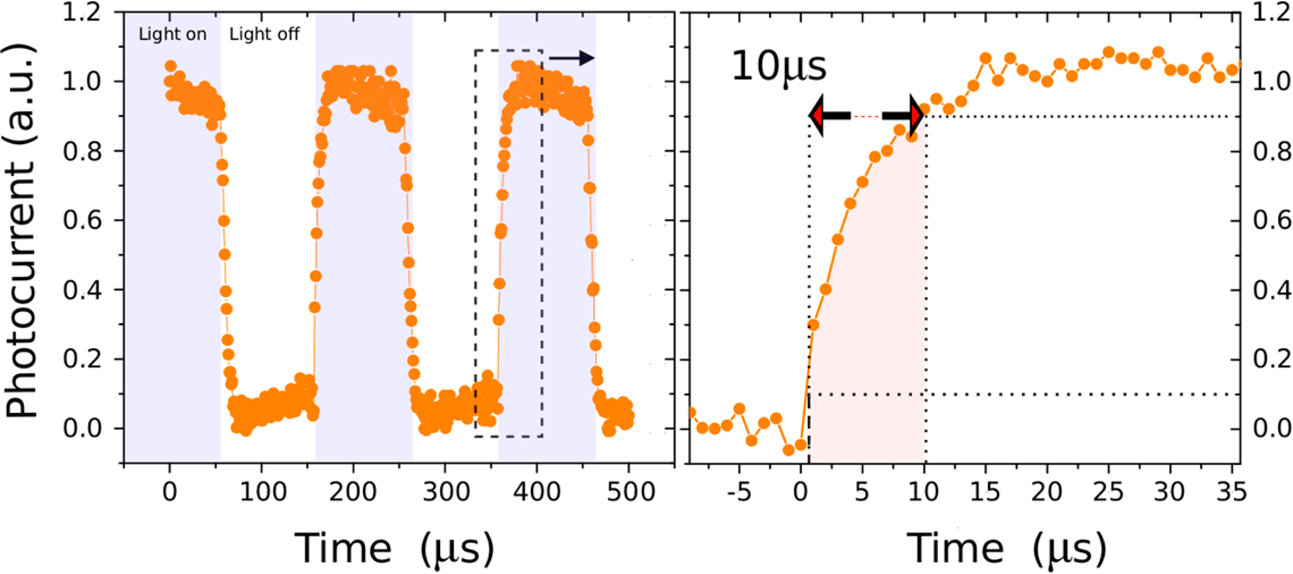

In [3]:
img

# SINGLE FILE FUNCTIONS

# Importing RAKE and assigning score to each phrase

In [166]:
from rake_nltk import Rake

In [157]:
r = Rake()
r.extract_keywords_from_text(listToStr)

In [158]:
phrases = r.get_ranked_phrases_with_scores()

In [150]:
table = pd.DataFrame(phrases,columns=['score','Phrase'])
table = table.sort_values('score',ascending=False)
table.head()

,score,Phrase
0,21.5,maximum external quantum efﬁ ciency
1,17.5,"2 %, yielding ∼ 23"
2,16.0,wavelength λ g corresponds
3,16.0,figure 22 b shows
4,14.1,relative efﬁ ciency improvement


# Converting object type values into int type

In [160]:
table['score']=table['score'].astype('int')

# Normalizing the document term matrix

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table['Phrase'])

# Splitting the dataset

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, table['score'], test_size=0.3, random_state=123)

# Build the Text Classification Model using TF-IDF

In [163]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.4146341463414634


# BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

In [167]:
from sklearn.feature_extraction.text import CountVectorizer

In [180]:
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (3,3))

In [181]:
text_counts= cv.fit_transform(table['Phrase'])

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, table['score'], test_size=0.3, random_state=1)

In [183]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.36585365853658536


# PCE

In [144]:
resultLines_eff = []
words = ['was achieved','resulted in', 'yielding','reported','improvement','PCE','obtained','yielded']
for line in selectedLines_eff_ff:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_eff.append(line)

resulted in a relative efﬁ ciency improvement of up to 35%. 
resulted in a relative efﬁ ciency improvement of up to 35%. 
external quantum efﬁ ciency (EQE) of around 15% was achieved 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than 
of  P:PCBM   =   1.6%  and  PCEs  of  PB:PCBM 
ternary  solar  cells  with  a  maximum  PCE  of  3.33%,  a  Jsc  of 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 , 
nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 , 
ternary  devices  exceeded  the  binary  cells  by  over  50%.  (PCEs 
co-EHT 25 :PCBM  composition,  a  PCEs  of  5.51%,  with  a  Jsc   =  
58.9% was achieved for a DTffBT: DTPyT:PCBM ternary cell at 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
P3HT.  The  PCEs  of  2.93%  with  a  Jsc   =   8.16  mA/cm 2 ,  Voc   =  
d

In [145]:
listToStr = ' '.join(map(str, resultLines_eff)) 
  
print(listToStr)  

resulted in a relative efﬁ ciency improvement of up to 35%.  resulted in a relative efﬁ ciency improvement of up to 35%.  external quantum efﬁ ciency (EQE) of around 15% was achieved  devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than  devices  obtained  PCEs  of  2.8%,  which  was  10%  higher  than  of  P:PCBM   =   1.6%  and  PCEs  of  PB:PCBM  ternary  solar  cells  with  a  maximum  PCE  of  3.33%,  a  Jsc  of  12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported.  nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 ,  nents  (1:1:1)  yielded  a  PCE  of  3.48%  with  Jsc   =   7.5  mA/cm 2 ,  ternary  devices  exceeded  the  binary  cells  by  over  50%.  (PCEs  co-EHT 25 :PCBM  composition,  a  PCEs  of  5.51%,  with  a  Jsc   =   58.9% was achieved for a DTffBT: DTPyT:PCBM ternary cell at  PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%.  P3HT.  The  PCEs  of  2.93%  with  a  Jsc   =   8.16  mA/cm 2 ,  Voc   =   d

In [146]:
from rake_nltk import Rake

In [147]:
r = Rake()
r.extract_keywords_from_text(listToStr)

In [148]:
phrases = r.get_ranked_phrases_with_scores()

In [149]:
table = pd.DataFrame(phrases,columns=['score','Phrase'])
table = table.sort_values('score',ascending=False)
table.head(50)

,score,Phrase
0,30.285714,25 wt .% p6 gave pces
1,20.500000,5 wt .% sinc exhibited
2,17.388889,"2 %, yielding ∼ 23"
3,14.833333,external quantum efﬁ ciency
4,13.933333,relative efﬁ ciency improvement
5,12.733333,pcbm ternary solar cells
6,12.625000,61 v photoactive layer
7,12.577381,61 v yielded pces
8,12.388889,"37 %, approximately 12"
9,11.785714,achieved devices obtained pces


In [150]:
table['score']=table['score'].astype('int')

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(table['Phrase'])

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, table['score'], test_size=0.3, random_state=123)

In [153]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.30303030303030304


In [66]:
df1 = pd.DataFrame(resultLines_eff_ff, columns =['Phrases']) 
df1 

,Phrases
0,resulted in a relative efﬁ ciency improvement ...
1,external quantum efﬁ ciency (EQE) of around 15...
2,58.9% was achieved for a DTffBT: DTPyT:PCBM te...
3,"photoactive layer, yielding 33% improvemen..."
4,"5.2%, yielding ∼ 23 and 18% performance ..."


# Voc

In [21]:
f = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'r',encoding="utf8")
volt = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx2 = r'[-\d.]+\d eV'

# loop over the results
for match in re.finditer(rx2, f.read()):
    interval2 = match.group(0).split('-')
    for number2 in interval2:
            volt.append(number2)

print (volt)

['0.5 eV', '0.5 eV', '0.2 eV', '1.59 eV', '1.59 eV', '', '3.45 eV', '', '3.8 eV']


In [52]:
import re
mylines2 = []                                # Declare an empty list.
with open (r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'rt',encoding="utf8") as myfile:    # Open lorem.txt for reading text.
    for myline in myfile:                   # For each line in the file,
        mylines2.append(myline.rstrip('\n')) # strip newline and add to list.
selectedLines_volt = []
for line in mylines2:                     # For each element in the list,
     if re.search(rx2,line):
            selectedLines_volt.append(line)
for i in selectedLines_volt:
    print(i)
    pass   

up to 0.5 eV. This study showed that for an empirical threshold 
windows. The ideal bandgap of the absorber for each absorption window is given for a LUMO-difference of 0 up to 0.5 eV. The dotted line indicates 
the empirical threshold of 0.2 eV. [  4  ]  Reproduced with the permission from Ref.  [  4  ] .  
revealed that photoexciting PCPDTBT (pump energy of 1.59 eV) 
ites created free charges on P3HT. This near-IR (1.59 eV) pho-
LUMO level of P and PB (-3.45 eV) suggests 
-3.8 eV and an absorption peak at  ∼ 370 nm, ternary solar cells 


In [56]:
resultLines_volt = []
words = ['was achieved','resulted in', 'yielding', 'calculated', 'measured', 'showed']
for line in selectedLines_volt:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_volt.append(line)

up to 0.5 eV. This study showed that for an empirical threshold 


In [57]:
print(resultLines_volt)

['up to 0.5 eV. This study showed that for an empirical threshold ']


# Wavelength

In [22]:
f = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'r',encoding="utf8")
wavelength = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx3 = r'[-\d.]+\d nm'

# loop over the results
for match in re.finditer(rx3, f.read()):
    interval3 = match.group(0).split('-')
    for number3 in interval3:
            wavelength.append(number3)

print (wavelength)

['100 nm', '565 nm', '650 nm', '775 nm', '400 nm', '680 nm', '680 nm', '532 nm', '1200 nm', '1000 nm', '400 nm', '100 nm', '511 nm', '650 nm', '700 nm', '30 nm', '220 nm', '650 nm', '420 nm', '760 nm', '750 nm', '652 nm', '800 nm', '680 nm', '600 nm', '370 nm', '600 nm', '780 nm', '780 nm', '600 nm', '405 nm', '40 nm', '450 nm', '40 nm', '70 nm', '100 nm', '850 nm']


In [22]:
w=str(wavelength)
print (re.findall('\d+',w))

['100', '565', '650', '775', '400', '680', '680', '532', '1200', '1000', '400', '100', '511', '650', '700', '30', '220', '650', '420', '760', '750', '652', '800', '680', '600', '370', '600', '780', '780', '600', '405', '40', '450', '40', '70', '100', '850']


In [58]:
import re
mylines3 = []                                # Declare an empty list.
with open (r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'rt',encoding="utf8") as myfile:    # Open lorem.txt for reading text.
    for myline in myfile:                   # For each line in the file,
        mylines3.append(myline.rstrip('\n')) # strip newline and add to list.
selectedLines_wavelength = []
for line in mylines3:                     # For each element in the list,
     if re.search(rx3,line):
            selectedLines_wavelength.append(line)
for i in selectedLines_wavelength:
    print(i)
    pass   

restricted to a few 100 nm width instead of to a plateau absorp-
b) Transient absorption proﬁ les at 565 nm (triangle) and 650 nm (circle) 
of a P3HT:PCPDTBT:PCBM (0.9:0.1:1) ﬁ lm excited at 775 nm. [  10  ]  Repro-
tation of P3HT at 400 nm), a small and sharp depression was 
observed at around 680 nm as shown in  Figure    9  a, which oth-
band of SiPc at 680 nm was investigated. As 
ecules was measured upon excitation wavelength of 532 nm, 
transient absorption signals of P3HT:PCBM (top) and P3HT:SiPc:PCBM blend ﬁ lms (bottom) for thermal annealed ﬁ lms at 1200 nm (P3HT excitons; 
closed circles) and 1000 nm (P3HT polarons; closed triangles) excited at 400 nm. The open circles show the normalized rise fraction of the SiPc 
of the ternary photoactive layer at 100 nm and for the binary ref-
and PB show a maximum absorption at 420 and 511 nm with 
with DTPyT as near IR sensitizer for the regime between 650 nm 
at around 580 and 700 nm, respectively. A similar composition-
The absorption

In [59]:
resultLines_wavelength = []
words = ['was achieved','resulted in', 'yielding', 'calculated', 'measured', 'showed']
for line in selectedLines_wavelength:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_wavelength.append(line)

ecules was measured upon excitation wavelength of 532 nm, 
DPP-CN showed an absorption band at 550–750 nm with a peak 


In [60]:
print(resultLines_wavelength)

['ecules was measured upon excitation wavelength of 532 nm, ', 'DPP-CN showed an absorption band at 550–750 nm with a peak ']


In [23]:
f = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'r',encoding="utf8")
wavelength = []
# look for -, a digit, a dot ending with a digit and a percentage sign
rx4 = r'[-\d.]+\d mA/cm 2'

# loop over the results
for match in re.finditer(rx4, f.read()):
    interval4 = match.group(0).split('-')
    for number4 in interval4:
            wavelength.append(number4)

print (wavelength)

['6.99 mA/cm 2', '12.67 mA/cm 2', '11.9 mA/cm 2', '5.7 mA/cm 2', '21.3 mA/cm 2', '10.3 mA/cm 2', '13.5 mA/cm 2', '10.9 mA/cm 2', '10.5 mA/cm 2', '12.29 mA/cm 2', '11.61 mA/cm 2']


In [48]:
import re
mylines4 = []                                # Declare an empty list.
with open (r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt', 'rt',encoding="utf8") as myfile:    # Open lorem.txt for reading text.
    for myline in myfile:                   # For each line in the file,
        mylines4.append(myline.rstrip('\n')) # strip newline and add to list.
selectedLines_current_density = []
for line in mylines4:                     # For each element in the list,
     if re.search(rx4,line):
            selectedLines_current_density.append(line)
for i in selectedLines_current_density:
    print(i)
    pass   

binary reference cells (7.86 and 6.99 mA/cm 2  for DTffBT:PCBM 
12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%. 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
annealing, leading to a PCEs of 4.1% with Jsc  =  10.3 mA/cm 2 , 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
ences. The highest PCEs of 4.3 with a Jsc  =  10.9 mA/cm 2 , Voc  =  
of 5.9% with Jsc  =  10.5 mA/cm 2 , Voc  =  0.78 V and FF  =  72%. 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
from 6.3% to 7.1% with the Jsc  =  11.61 mA/cm 2 , Voc  =  0.88 V 


In [65]:
resultLines_current_density = []
words = ['was achieved','resulted in', 'yielding', 'calculated', 'measured', 'showed','were reported','yielded','Jsc']
for line in selectedLines_current_density:
    for word in words:
        if(line.find(word) != -1):
            print(line)
            resultLines_current_density.append(line)

12.67 mA/cm 2 , a Voc of 0.55 V and a FF of 48% were reported. 
5.88% with Jsc  =  11.9 mA/cm 2 , Voc  =  0.81 V and FF  =  60.68%. 
PCE  =  2% with Jsc  =  5.7 mA/cm 2 , Voc  =  0.86 V and FF  =  40%. 
with Jsc  =  21.3 mA/cm 2 , Voc  =  0.6 V and FF  =  44% (30% PCE 
annealing, leading to a PCEs of 4.1% with Jsc  =  10.3 mA/cm 2 , 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
yielded PCEs of 4.5% and a Jsc  =  13.5 mA/cm 2 , Voc  =  0.61 V 
ences. The highest PCEs of 4.3 with a Jsc  =  10.9 mA/cm 2 , Voc  =  
of 5.9% with Jsc  =  10.5 mA/cm 2 , Voc  =  0.78 V and FF  =  72%. 
efﬁ ciency up to 4.3% with a Jsc  =  12.29 mA/cm 2 , Voc  =  0.64 V 
from 6.3% to 7.1% with the Jsc  =  11.61 mA/cm 2 , Voc  =  0.88 V 


In [92]:
import pandas as pd
import numpy as np
f = open(r'C:\Users\hp\Desktop\PDFtotext\Ameri et al. - 2013 - Organic ternary solar cells A review.pdf.txt','r',encoding="utf8")
keywords = re.findall(r'[a-zA-Z]\w+',f.read())
len(keywords) 

12479

In [93]:
df = pd.DataFrame(list(set(keywords)),columns=['keywords'])

In [94]:
def weightage(word,keywords,number_of_documents=1):
    word_list = re.findall(word,keywords)
    number_of_times_word_appeared =len(word_list)
    tf = number_of_times_word_appeared/float(len(keywords))
    idf = np.log((number_of_documents)/float(number_of_times_word_appeared))
    tf_idf = tf*idf
    return number_of_times_word_appeared,tf,idf ,tf_idf

In [95]:
df['number_of_times_word_appeared'] = df['keywords'].apply(lambda x: weightage(x,text)[0])
df['tf'] = df['keywords'].apply(lambda x: weightage(x,text)[1])
df['idf'] = df['keywords'].apply(lambda x: weightage(x,text)[2])
df['tf_idf'] = df['keywords'].apply(lambda x: weightage(x,text)[3])

In [96]:
df = df.sort_values('tf_idf',ascending=True)
df.to_csv('Keywords.csv')
df.head(25)

,keywords,number_of_times_word_appeared,tf,idf,tf_idf
585,he,1156,0.010999,-7.052721,-0.077572
193,an,994,0.009458,-6.901737,-0.065274
1559,in,990,0.009420,-6.897705,-0.064973
1641,on,874,0.008316,-6.773080,-0.056324
2234,the,822,0.007821,-6.711740,-0.052493
2318,at,695,0.006613,-6.543912,-0.043273
1159,or,657,0.006251,-6.487684,-0.040555
1767,ed,656,0.006242,-6.486161,-0.040484
650,nd,604,0.005747,-6.403574,-0.036800
1373,of,553,0.005262,-6.315358,-0.033229


In [29]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [99]:
from gensim.summarization import keywords
import warnings
warnings.filterwarnings("ignore")

In [100]:
values = keywords(text=text,split='\n',scores=True)

In [101]:
data = pd.DataFrame(values,columns=['keyword','score'])
data = data.sort_values('score',ascending=False)
data.head(20)

,keyword,score
0,pcbm,0.249174
2,energy,0.187785
1,energies,0.187785
3,cells,0.180025
4,cell,0.180025
5,sensitizers,0.166998
6,sensitivity,0.166998
7,sensitizer,0.166998
8,sensitization,0.166998
9,sensitized,0.166998


In [33]:
pip install python-rake

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


In [102]:
from rake_nltk import Rake

In [103]:
r = Rake()
r.extract_keywords_from_text(text)

In [104]:
phrases = r.get_ranked_phrases_with_scores()

In [105]:
table = pd.DataFrame(phrases,columns=['score','Phrase'])
table = table.sort_values('score',ascending=False)
table.head(50)

,score,Phrase
0,98.370669,78 ff [%] 56 69 68 69 65 56 71 72 pce [%]%) 3
1,75.569512,year 2010 2012 2011 2012 2012 2012 2012 2009 2...
2,74.635913,92 ff [%] 51 41 71 66 50 72 70 pce [%] 2
3,48.213315,high efﬁ cient low bandgap polymers exhibit ch...
4,44.820245,40 wt .% without signiﬁ cant ff losses demonst...
5,37.804735,investigated ternary solar cells containing tw...
6,37.110128,p3ht ternary devices containing 2 wt .% ag nps
7,36.758333,thbt formed separated big crystalline domains ...
8,36.343953,early reported ternary solar cells containing ...
9,36.334074,"com contents signiﬁ cantly exceeding 20 wt .%,"


In [106]:
from nltk.tokenize import word_tokenize
phrase = table.Phrase.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(phrase)
vocabulary = set(tokens)
print(vocabulary)
#gives the top 50 words used in the text

{'pivrikas', '140', 'serdar', '1200', '4256', 'revealed', 'locating', 'cated', 'vision', 'dithien', 'pied', 'requirements', 'pl', 'pcbb', 'capacity', 'pia', 'china', 'meh', 'limit', 'dissociate', 'photonics', '450', 'photoexcited', 'dihydroxyphenyl', 'furthermore', '99', 'dots', 'possible', 'squares', '350', '4262', 'ambipolarity', 'macromol', 'linear', 'uenced', 'nature', '}', 'fu', 'disordered', 'ink', 'schilinsky', 'lumo', 'cm2', 'hwang', 'feasibility', 'copolymer', 'dio', 'fre', 'tsami', 'fundamental', '3044', 'egbe', 'co', '201300623', '30', 'annealing', 'mix', 'understand', 'lumos', 'glycerol', 'pce', 'insights', 'cumepc', 'low', 'kinetics', 'change', 'formation', 'side', 'amor', 'wider', '223508', 'malononitrile', 'atomic', 'nir', 'tackle', 'chromophores', 'excited', 'subcells', '’', '24', 'veronis', 'voltage', 'nm', 'result', 'volumes', 'gradually', 'zhou', 'representation', 'enabled', 'ta', 'crys', 'chromophore', 'cb', 'dtbt', 'big', 'renewable', 'doi', 'bithiophene', 'kepler'

In [107]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

In [108]:
print(tokens)
#remove the stop words. cleaned text corpus

['78', 'ff', '[', '%', ']', '56', '69', '68', '69', '65', '56', '71', '72', 'pce', '[', '%', ']', '%', ')', '3', 'year', '2010', '2012', '2011', '2012', '2012', '2012', '2012', '2009', '2011', '2011', '2012', 'binary', 'cell', '92', 'ff', '[', '%', ']', '51', '41', '71', '66', '50', '72', '70', 'pce', '[', '%', ']', '2', 'high', 'efﬁ', 'cient', 'low', 'bandgap', 'polymers', 'exhibit', 'charge', 'carrier', 'recombi', '40', 'wt', '.', '%', 'without', 'signiﬁ', 'cant', 'ff', 'losses', 'demonstrates', 'investigated', 'ternary', 'solar', 'cells', 'containing', 'two', 'p3ht', 'analogue', 'donors', 'p3ht', 'ternary', 'devices', 'containing', '2', 'wt', '.', '%', 'ag', 'nps', 'thbt', 'formed', 'separated', 'big', 'crystalline', 'domains', 'apart', 'early', 'reported', 'ternary', 'solar', 'cells', 'containing', 'dye', 'sensitizers', 'com', 'contents', 'signiﬁ', 'cantly', 'exceeding', '20', 'wt', '.', '%', ',', 'de', 'v', 'e', 'r', 'w', 'layers', '’', 'thicknesses', '57', 'ff', '[', '%', ']', '6

In [109]:
table['Phrase'].head(10)

0        78 ff [%] 56 69 68 69 65 56 71 72 pce [%]%) 3
1    year 2010 2012 2011 2012 2012 2012 2012 2009 2...
2             92 ff [%] 51 41 71 66 50 72 70 pce [%] 2
3    high efﬁ cient low bandgap polymers exhibit ch...
4    40 wt .% without signiﬁ cant ff losses demonst...
5    investigated ternary solar cells containing tw...
6       p3ht ternary devices containing 2 wt .% ag nps
7    thbt formed separated big crystalline domains ...
8    early reported ternary solar cells containing ...
9       com contents signiﬁ cantly exceeding 20 wt .%,
Name: Phrase, dtype: object

In [110]:
table['Phrase'] = table['Phrase'].str.replace('[^\w\s]','')
table['Phrase'].head(10)

0                78 ff  56 69 68 69 65 56 71 72 pce  3
1    year 2010 2012 2011 2012 2012 2012 2012 2009 2...
2                   92 ff  51 41 71 66 50 72 70 pce  2
3    high efﬁ cient low bandgap polymers exhibit ch...
4    40 wt  without signiﬁ cant ff losses demonstrates
5    investigated ternary solar cells containing tw...
6         p3ht ternary devices containing 2 wt  ag nps
7    thbt formed separated big crystalline domains ...
8    early reported ternary solar cells containing ...
9          com contents signiﬁ cantly exceeding 20 wt 
Name: Phrase, dtype: object

In [49]:
freq = pd.Series(' '.join(table['Phrase']).split()).value_counts()[-10:]

In [50]:
freq

rela            1
370             1
assessing       1
048             1
duced           1
bleaching       1
people          1
considerable    1
suggest         1
polar           1
dtype: int64

In [63]:
import numpy as np
symbols = "!\"#$''%&()*+-/:;<=>?@[\]^_`{|},~\n"
for i in symbols:
    resultLines_eff_ff = np.char.replace(resultLines_eff_ff, i, ' ')
print(resultLines_eff_ff)